In [2]:
import sqlite3
import pandas as pd
import seaborn as sb
import altair as alt
import numpy as np
from multiprocessing import Pool
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# Getting Started

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression

/Users/hannahweber/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hannahweber/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
df = pd.read_csv("filtered_groups_defg.csv")

/Users/hannahweber/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Original columns
len(df.columns)

40

In [8]:
#dropping columns that will have little to no effect on model performance or contain NaN values
drop_cols = ['Unnamed: 0','OBJECTID', 'FOD_ID', 'FPA_ID','NWCG_REPORTING_UNIT_ID','NWCG_REPORTING_UNIT_NAME','SOURCE_REPORTING_UNIT','SOURCE_REPORTING_UNIT_NAME','LOCAL_FIRE_REPORT_ID','LOCAL_INCIDENT_ID','FIRE_CODE','FIRE_NAME','ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME','COMPLEX_NAME','DISCOVERY_DATE','STAT_CAUSE_CODE','FIPS_CODE', 'FIPS_NAME', 'Shape','OWNER_CODE','DISCOVERY_TIME','COUNTY','CONT_DATE','CONT_DOY','CONT_TIME','SOURCE_SYSTEM','SOURCE_SYSTEM_TYPE']
df = df.drop(columns=drop_cols)

In [11]:
df_dummies_X = df.drop(columns=['STAT_CAUSE_DESCR'])
df_dummies_X = pd.get_dummies(df_dummies_X)
X = df_dummies_X
Y = df['STAT_CAUSE_DESCR']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=1, stratify=Y)


classifier = Perceptron(eta0=0.3, n_iter=500)

classifier.fit(X_train, Y_train)
training_accuracy = accuracy_score(Y_train, classifier.predict(X_train))
pred = classifier.predict(X_test)
test_accuracy = accuracy_score(Y_test, pred)

print(test_accuracy)

/Users/hannahweber/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.3030317034846104


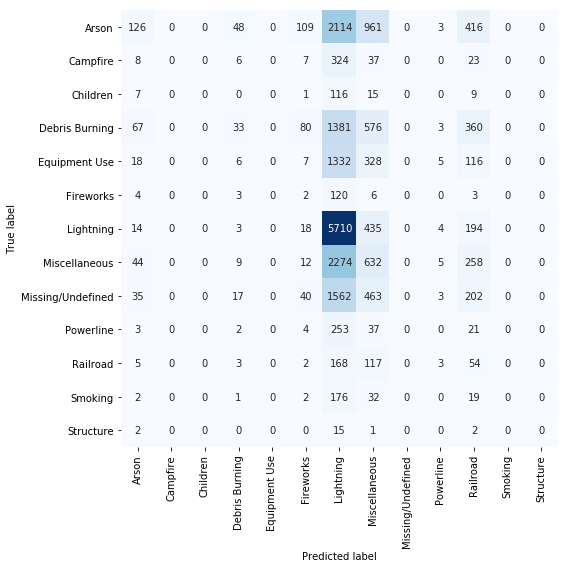

In [12]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
import altair as alt
label_names = sorted(df['STAT_CAUSE_DESCR'].unique())

matrix = confusion_matrix(Y_test, pred)
plt.figure(figsize=(8,8))
sb.heatmap(matrix,square=True,annot=True, fmt='d', cbar=False, cmap='Blues',
          xticklabels=label_names,yticklabels=label_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig("perceptronconfusionmatrix.png", dpi=170)

In [14]:
precision_score(Y_test,pred,average='macro')

/Users/hannahweber/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0929398051347828

In [28]:
# Weight Vector of Perceptron
classifier.coef_

array([[ 1.47510000e+03, -4.63500000e+02, -3.54261499e+03, ...,
        -1.47150000e+03,  1.49007000e+04, -7.96440000e+03],
       [-2.25600000e+02,  4.89000000e+02, -8.85802855e+03, ...,
         3.35400000e+02, -1.74000000e+01, -2.88600000e+02],
       [ 8.20470000e+03,  7.78800000e+02, -1.73207425e+05, ...,
        -5.49000000e+01,  3.00000000e+02, -4.84800000e+02],
       ...,
       [ 2.33700000e+03, -1.39200000e+02, -2.84320110e+04, ...,
         3.42300000e+02, -7.53900000e+02,  2.76330000e+03],
       [ 1.94010000e+03,  6.45900000e+02, -4.67607181e+04, ...,
         2.11500000e+02, -8.09400000e+02, -2.78700000e+02],
       [ 1.00710000e+03,  1.80120000e+03, -3.75578130e+04, ...,
        -6.90000000e+00,  7.82700000e+02, -6.03000000e+01]])

In [29]:
df.columns

Index(['NWCG_REPORTING_AGENCY', 'FIRE_YEAR', 'DISCOVERY_DOY',
       'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_DESCR', 'STATE'],
      dtype='object')

In [31]:
print("\nFeature weights:")
feature_names = list(df_dummies_X.columns)
for i,a in enumerate(feature_names):
    print(a + ": " + str(classifier.coef_[0][i]))
    
# longitude, oklahoma, latitude


Feature weights:
FIRE_YEAR: 1475.0999999982137
DISCOVERY_DOY: -463.499999999783
FIRE_SIZE: -3542.614988999132
LATITUDE: 47822.44033387151
LONGITUDE: 54051.50344081828
NWCG_REPORTING_AGENCY_BIA: 29780.699999951146
NWCG_REPORTING_AGENCY_BLM: -13466.999999990712
NWCG_REPORTING_AGENCY_BOR: -22.500000000000032
NWCG_REPORTING_AGENCY_DOD: -767.399999999975
NWCG_REPORTING_AGENCY_DOE: 0.0
NWCG_REPORTING_AGENCY_FS: 20124.299999974566
NWCG_REPORTING_AGENCY_FWS: -2087.699999999805
NWCG_REPORTING_AGENCY_IA: -7592.700000003143
NWCG_REPORTING_AGENCY_NPS: -3643.8000000007487
NWCG_REPORTING_AGENCY_ST/C&L: -32461.499999944645
NWCG_REPORTING_AGENCY_TRIBE: 10535.099999997823
FIRE_SIZE_CLASS_D: -137686.2000006409
FIRE_SIZE_CLASS_E: 102854.70000062382
FIRE_SIZE_CLASS_F: 37447.199999989294
FIRE_SIZE_CLASS_G: -2218.1999999998843
OWNER_DESCR_BIA: 23108.699999967328
OWNER_DESCR_BLM: -11774.399999994817
OWNER_DESCR_BOR: -11.700000000000006
OWNER_DESCR_COUNTY: -1145.9999999999177
OWNER_DESCR_FWS: 590.70000000000